In [1]:
import networkx as nx
import matplotlib.pyplot as plt

In [2]:
def _draw_graph(Graph):
    Dimension = 1
    FigDimension = 5
    fig,axes = plt.subplots(nrows=Dimension,ncols=Dimension,figsize=(FigDimension,FigDimension),dpi=200)
    nx.draw_circular(Graph, ax=axes, with_labels=True, edge_color='black', node_color='black', font_color='white')
    axes.set_title("Graph 0")

In [3]:
def _digraph_from_list_list(ListList):
    AdjacencyList = ""
    RowCounter = 0
    for row in ListList:
        AdjacencyList += f"{RowCounter}"
        ColumnCounter = 0
        for column in row:
            if RowCounter != ColumnCounter:
                if DataStream[RowCounter][ColumnCounter] == 1:
                    AdjacencyList += f" {ColumnCounter}"
            ColumnCounter += 1
        AdjacencyList += "\n"
        RowCounter += 1
    return nx.parse_adjlist(AdjacencyList.splitlines(), nodetype=int, create_using=nx.DiGraph())

In [4]:
def _reverse_transitivity_reduce(Graph):
    DiGraph = nx.DiGraph(Graph).copy()
    for TargetNode in DiGraph.nodes():
        for SourceNode in DiGraph.nodes():
            if SourceNode == TargetNode:
                continue
            if not DiGraph.has_edge(SourceNode, TargetNode):
                if nx.has_path(DiGraph, SourceNode, TargetNode):
                    DiGraph.add_edge(SourceNode, TargetNode)
    return DiGraph

In [5]:
def _listlist_from_digraph(DiGraph):
    listlist = []
    for Columns in range(DiGraph.number_of_nodes()):
        Column = []
        for Rows in range(DiGraph.number_of_nodes()):
            if Rows==Columns:
                Column.append(1)
            else:
                Column.append(0)
        listlist.append(Column)
    for Edge in nx.generate_edgelist(DiGraph, data=False):
        listlist[int(Edge.split(" ")[0])-1][int(Edge.split(" ")[1])-1] = 1
    return listlist

In [6]:
def _relabel(DiGraph):
    Mapping = dict()
    for Node in DiGraph.nodes():
        Mapping[Node] = Node+1
    return nx.relabel_nodes(DiGraph, Mapping, True)

In [7]:
def _draw_diagram(Graph):
    
    BaseElements = []
    
    Distances = []
    for x in range(len(Graph)):
        temp = []
        for y in range(len(Graph)):
            temp.append(0)
        Distances.append(temp)
    
    for source in Graph:
        
        if Graph.in_degree(source) == 0:
            BaseElements.append(source)
            
        for target in Graph:
            if nx.has_path(Graph, source, target) and source != target:
                distance = len(max(nx.all_simple_paths(Graph, source, target), key=lambda x: len(x)))-1
#                 print(f"The longest path between {source} and {target} is: {distance}")
                Distances[source-1][target-1] = distance
#             elif source == target:
# #                 print(f"The longest path between {source} and {target} is: 1, they are the same")
#                 Distances[source-1][target-1] = 0
            else:
#                 print(f"There is no path between {source} and {target}")
                Distances[source-1][target-1] = 0
    
    print("Distance matrix:")
    for row in Distances:
        print(row)
    
    print(f"Base elements: {BaseElements}")
    
    MaxX = 0
    MaxPlacedOnLevel = 0
    XOffset = 1
    Positions = dict()
    for Base in BaseElements:
#         print(f"Inspecting the base element: {Base}, who's relationship array is: {Distances[Base-1]}")
        Positions[Base] = (MaxX,0)
        for distance in list(set(Distances[Base-1])):
            if distance <= 0:
                continue
            indices = [i for i in range(len(Distances[Base-1])) if Distances[Base-1][i] == distance]
            MaxPlacedOnLevel = max(len(indices), MaxPlacedOnLevel)
#             print(f"Looking at distance: {distance}, the indices are {indices}")
            for index in indices:
                print(f"{index+1} needs to be placed on the {distance} level, above {Base}")
        MaxX += (MaxPlacedOnLevel+1)*XOffset

Input matrix:
[1, 0, 1, 1, 0, 0]
[0, 1, 0, 0, 0, 1]
[0, 0, 1, 0, 1, 0]
[0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 0, 1]
Distance matrix:
[0, 0, 1, 1, 2, 2]
[0, 0, 0, 0, 0, 1]
[0, 0, 0, 0, 1, 0]
[0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
Base elements: [1, 2]
3 needs to be placed on the 1 level, above 1
4 needs to be placed on the 1 level, above 1
5 needs to be placed on the 2 level, above 1
6 needs to be placed on the 2 level, above 1
6 needs to be placed on the 1 level, above 2


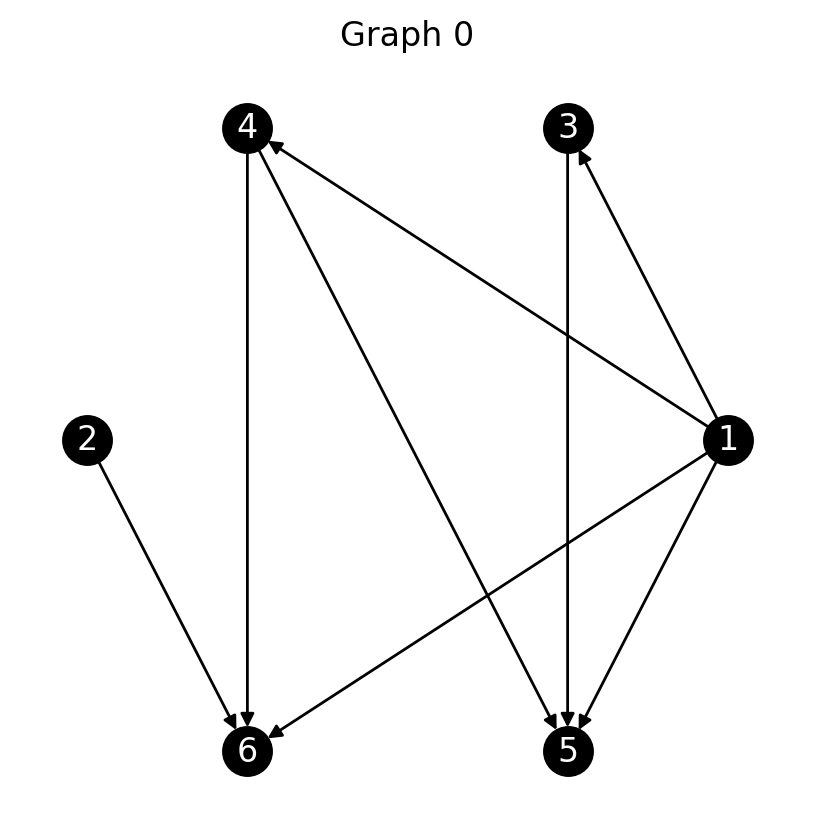

In [8]:
DataStream = [
    [1, 1, 0, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 0, 1, 1],
    [0, 0, 0, 0, 1]
]

DataStream = [
    [1, 1, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [0, 0, 1, 1, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 1],
    [0, 0, 0, 0, 0, 1]
]

DataStream = [
    [1, 0, 1, 1, 0, 0],
    [0, 1, 0, 0, 0, 1],
    [0, 0, 1, 0, 1, 0],
    [0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 1]
]

print("Input matrix:")
for row in DataStream:
    print(row)

DiGraph = (_digraph_from_list_list(DataStream))
# _draw_graph(DiGraph)
DiGraph = _relabel(_digraph_from_list_list(DataStream))
# _draw_graph(DiGraph)
OutputStream = (_listlist_from_digraph(DiGraph))
DiGraph = _reverse_transitivity_reduce(DiGraph)
_draw_graph(DiGraph)
_draw_diagram(DiGraph)
OutputStream = (_listlist_from_digraph(DiGraph))